In [1]:
import onnx
import onnxruntime

In [2]:
model = onnx.load('../../artifact/deepfillv2_mod_simp_int8.onnx')

In [3]:
# onnx.helper.printable_graph(model.graph)

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

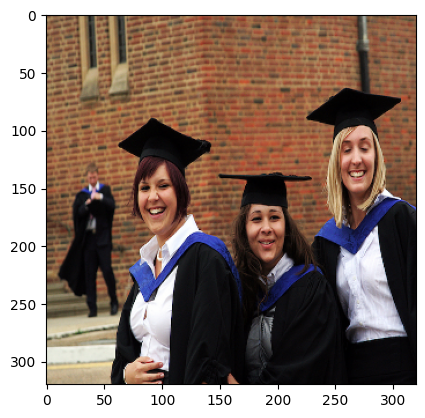

In [7]:
img = cv2.imread("../../test_data/2.png")
img = cv2.resize(img, (320, 320))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = np.expand_dims((img.astype(np.float32)/255.0).transpose(2,0,1), axis=0)

In [8]:
mask = cv2.imread("../../test_data_mask/2.png", 0)
mask = cv2.resize(mask, (320, 320))
_, thresh = cv2.threshold(mask, 70, 255, 0)
mask = np.expand_dims((mask.astype(np.float32)/255.0), axis=0)
mask = np.expand_dims(mask, axis=0) 

In [9]:
sess = onnxruntime.InferenceSession('../../artifact/deepfillv2_mod_simp_int8.onnx', providers=['CPUExecutionProvider'])

In [10]:
print(sess.get_inputs()[0].name)
print(sess.get_inputs()[0].shape)
print(sess.get_inputs()[1].name)
print(sess.get_inputs()[1].shape)

onnx::Mul_0
[1, 3, 320, 320]
mask.1
[1, 1, 320, 320]


In [11]:
results = sess.run(None, {
    "onnx::Mul_0": img,
    "mask.1": mask
})

In [12]:
first, second = results

In [13]:
whole_img = img * (1.0 - mask) + second * mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.013453391..1.0].


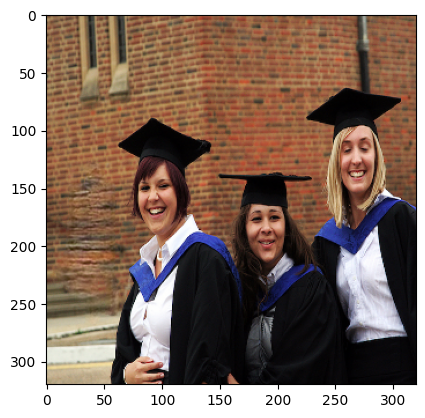

In [14]:
whole_img = np.squeeze(whole_img)
whole_img = whole_img.transpose(1,2,0)
plt.imshow(whole_img)